<a href="https://colab.research.google.com/github/Vasudev-SN/MPEA_dataset/blob/master/Assignment_1_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('power_plant.csv')

In [4]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [5]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.isna().sum().sum()

0

In [9]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [10]:
  df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


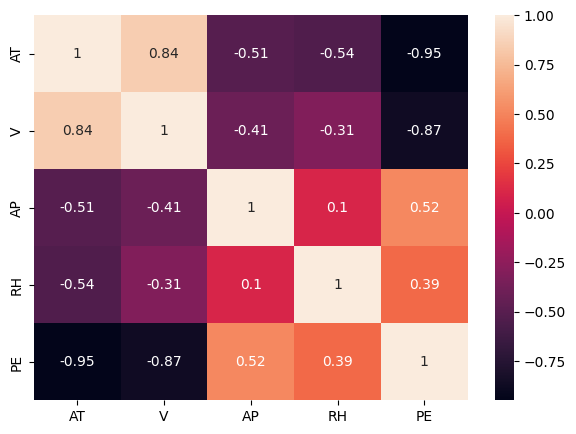

In [11]:
import seaborn as sns
plt.figure(figsize = (7, 5))
sns.heatmap(df.corr(), annot = True);


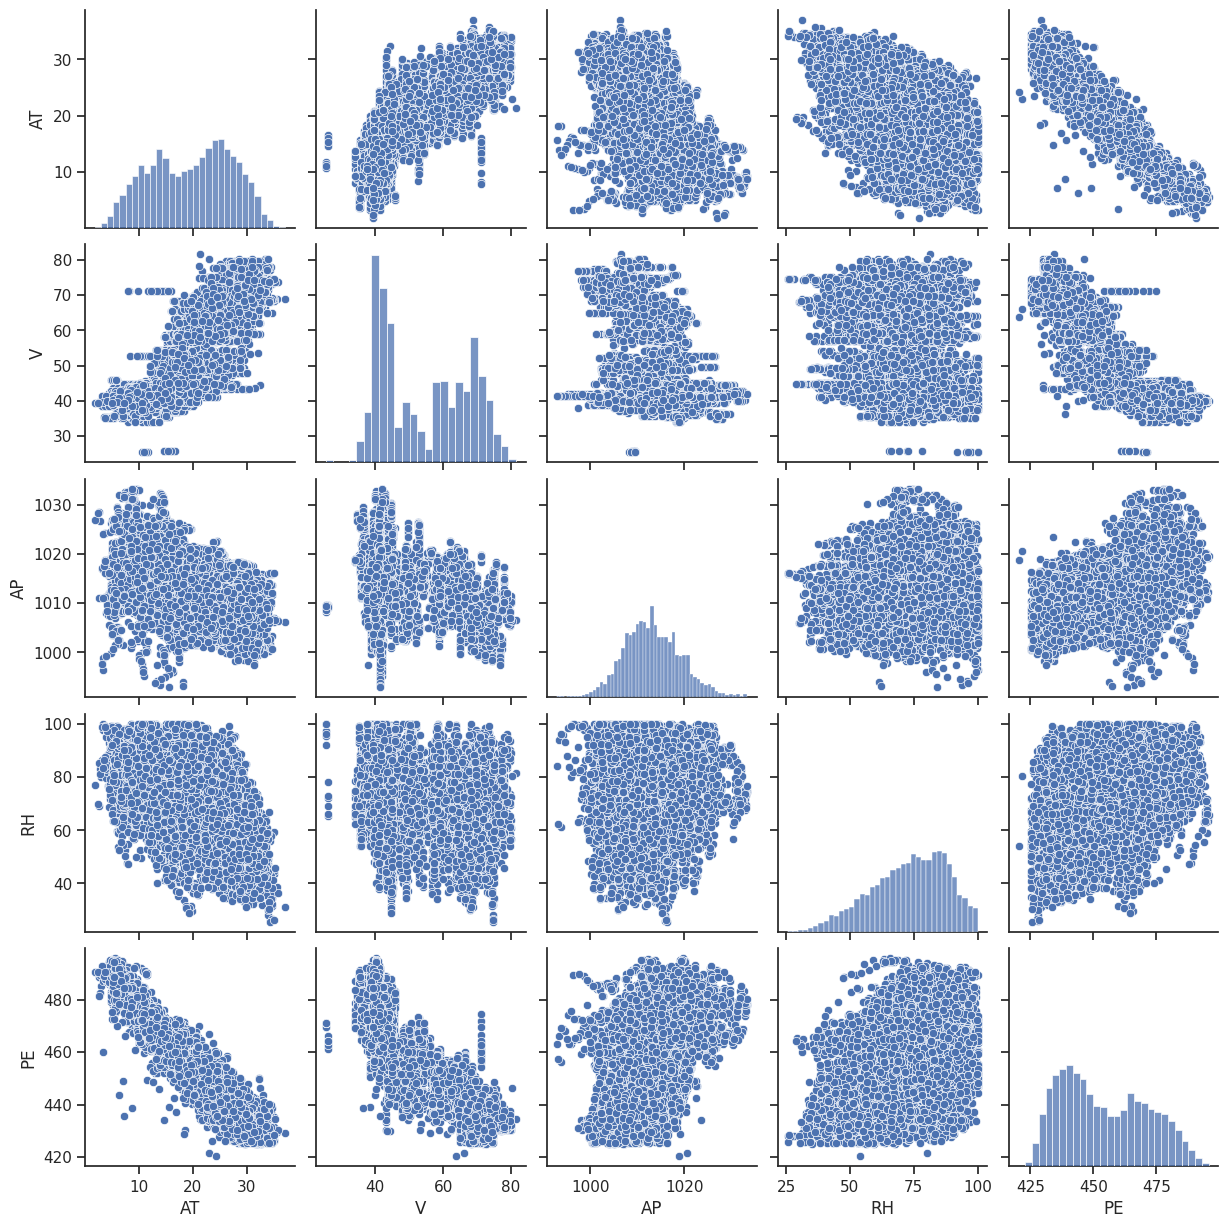

In [12]:
sns.set(style='ticks')
sns.pairplot(df, diag_kind = 'hist');

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [25]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(1)
])

In [29]:
model.compile(optimizer='adam', loss='mse')

In [30]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
240/240 [==============================] - 3s 3ms/step - loss: 205638.8125 - val_loss: 204808.0625
Epoch 2/100
240/240 [==============================] - 1s 2ms/step - loss: 203015.5781 - val_loss: 201386.4844
Epoch 3/100
240/240 [==============================] - 1s 2ms/step - loss: 198740.4375 - val_loss: 196024.3281
Epoch 4/100
240/240 [==============================] - 1s 2ms/step - loss: 192424.6250 - val_loss: 188589.1406
Epoch 5/100
240/240 [==============================] - 1s 2ms/step - loss: 184309.1250 - val_loss: 179646.0938
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 174922.7344 - val_loss: 169632.4844
Epoch 7/100
240/240 [==============================] - 1s 2ms/step - loss: 164718.8750 - val_loss: 158999.6094
Epoch 8/100
240/240 [==============================] - 1s 3ms/step - loss: 154035.4844 - val_loss: 148067.6719
Epoch 9/100
240/240 [==============================] - 1s 2ms/step - loss: 143203.6719 - val_loss: 137137.1094
E

In [31]:
y_pred = model.predict(X_test)
mse = tf.keras.losses.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse.numpy())

60/60 [==============================] - 0s 1ms/step
Mean Squared Error: [814.1001  306.66183 354.92334 ... 506.49368 442.5398  342.39783]


In [32]:
import matplotlib.pyplot as plt


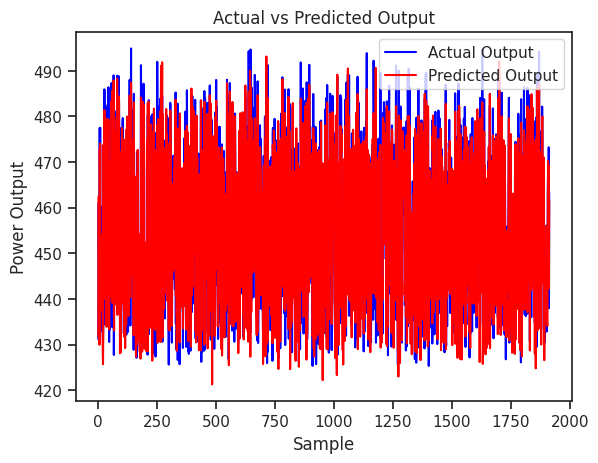

In [33]:
plt.plot(y_test, color='blue', label='Actual Output')
plt.plot(y_pred, color='red', label='Predicted Output')
plt.title('Actual vs Predicted Output')
plt.xlabel('Sample')
plt.ylabel('Power Output')
plt.legend()
plt.show()